# <span style="color:green"> Bachelor Thesis </span>

## <span style="color:yellowgreen"> Advisor: Professor Stefano Olivares </span>
## <span style="color:yellowgreen"> Co-Advisor: Professor Matteo Paris </span>

## <span style="color:yellowgreen"> Student: Davide Mapelli </span>
## <span style="color:yellowgreen"> Academic Year: 2020-2021 </span>
## <span style="color:yellowgreen"> University of Milan </span>

## Quantum optical correlations in the absence of intensity correlations

The simplest way to characterize optical states is based on intensity measurements leading also to the birth of intensity correlations when the system is investigated by using suitable interferometric setups. However, it is possible to have correlations beyond the intensity ones. In this thesis we study a particular class of state that, when sent through a beam splitter, do not give rise to intensity correlation but to quantum ones. We apply the modern tools of quantum information to characterize such states and discuss their possible application in quantum communication.

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.cm as cm

import numpy as np
from numpy import *

import math

from sympy import *
import sympy as sp
from sympy import Symbol, exp, sin, sqrt, diff, Abs, oo

## <span style="color:blue">  #1 </span> 13/07/2021

We consider a particular state $\hat \varrho$, defined as the following mixture:
\begin{equation}
    \hat \varrho = \sum_{n=0}^2{p_n  |n\rangle \langle n|} = p_0 |0\rangle \langle0| + p_1 |1\rangle \langle1| + p_2 |2\rangle \langle2|.
\end{equation}
This is the simplest possible superposition of the Fock's states. We want this state to have the statistical properties (mean and variance) of a thermal state.
In order to find the three coefficient $p_n$ let's consider the three conditions:
- Normalization :$ \sum_{n=0}^2{p_n} = 1$
- Mean: $\langle n \rangle := \text{Tr}[\hat \rho n] = p_1 + 2 p_2 \equiv N_{th}$
- Variance: $\Delta^2 (n) = \text{Var}(n) :=  \langle n^2 \rangle - \langle n \rangle ^2 = Tr[\hat \rho n^2] -  Tr[\hat \rho n]^2 \equiv N_{th}(N_{th}+1)$

$$
\begin{cases}
p_0 + p_1 + p_2 = 1\\
p_1+2p_2 = N_{th}\\
p_1 + 4 p_2 - (p_1 +2p_2)^2 = N_{th}(N_{th}+1)\\
\end{cases}
$$

In [4]:
p0, p1, p2, Nth= symbols('p_0, p_1, p_2, N_{th}')
eq1 = p0 + p1 + p2 -1
eq2 = p1 + 2*p2 - Nth
eq3 = p1+4*p2-(p1+2*p2)**2 - Nth*(Nth+1)
solve([eq1, eq2, eq3], (p0, p1, p2))

[(N_{th}**2 - N_{th} + 1, -N_{th}*(2*N_{th} - 1), N_{th}**2)]

With this constraints one finds: 
$$
\begin{cases}
p_0 = N_{th}^2 - N_{th} +1\\
p_1 = N_{th} - 2N_{th}^2\\
p_2 = N_{th}^2\\
\end{cases}
$$

With the condition that $p_n > 0 \leftrightarrow  0 < N_{th} < \frac {1}{2}$

So we have : 

$$
 \hat \varrho (N_{th})  = (N_{th}^2 - N_{th} +1) |0\rangle \langle0| +  (N_{th} - 2N_{th}^2) |1\rangle \langle1| +  (N_{th}^2) |2\rangle \langle2|
$$

With boundary values:
$$
\hat \varrho (0)  =  |0\rangle \langle0|; \qquad \text{vacuum state}\\
\hat \varrho (1/2)  = \frac{3}{4} |0\rangle \langle0|  +  \frac{1}{4} |2\rangle \langle2|
$$

### Plot

- We can plot the $p_n$ probability as a functions of $N_{th} = \frac{1}{exp\left(\frac{\hbar \omega}{\kappa_B T}\right)-1} $, the density distribution of a population of photons (bosons)

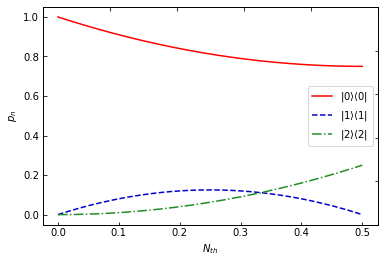

In [8]:
N = linspace(0, 0.5, 400)
M = linspace(0,1,400)
a = N**2 - N +1
b = N - 2*N**2
c = N**2
fig, ax = plt.subplots(1)
ax.plot(N, a, 'red', label=r"$|0\rangle \langle0|$", linestyle = 'solid')
ax.plot(N, b, 'mediumblue',label=r"$|1\rangle \langle1|$", linestyle = 'dashed')
ax.plot(N, c, 'forestgreen',label=r"$|2\rangle \langle2|$", linestyle = 'dashdot')

axR = ax.twinx()
axT = ax.twiny()
ax.tick_params(direction='in')
axT.tick_params(direction='in')
axR.tick_params(direction='in')
axR.yaxis.set_major_formatter(plt.NullFormatter())
axT.xaxis.set_major_formatter(plt.NullFormatter())

ax.legend()
ax.set_xlabel(r"$N_{th}$")
ax.set_ylabel(r"$p_n$")

plt.savefig("foto/pn.pdf", dpi=300, bbox_inches='tight')
plt.savefig("ppt/pn.png", dpi=300, bbox_inches='tight')
plt.show()

As we expected we start only with the vacuum state $|0\rangle \langle0|$, as the energy $N_{\text{th}}$ increases, the contribution given by the vacumm state become smaller and we end with both the vacuum and the $|2\rangle \langle2|$ state. The intersection is at $N_{th}=\frac{1}{3}$

## <span style="color:blue">  #2 </span> 17/07/2021

### Correlation function

Now we are interested in sending the state described by the $\hat \varrho$ density operatore through a beam splitter with a transmittance $\tau = \frac{1}{2}$. We want to calculate che $\Gamma$ intensity correlation function:

$$
\Gamma = \frac{\langle N_cN_d\rangle - \langle N_c\rangle \langle N_d \rangle }{\sqrt{\text{Var}(N_c)\text{Var}(N_d)}}
$$

Where we can demonstrate that, for $\tau = 1/2$ :

$$
\begin {cases}
N_c = \tau N_a + (1-\tau) N_b + \sqrt{\tau(1-\tau)}(x_a x_b+p_a p_b) = \frac{1}{2}(N_a+N_b) + \frac{1}{2}(x_ax_b+p_ap_b) \\
N_d = \tau N_a + (1-\tau) N_b - \sqrt{\tau(1-\tau)}(x_a x_b+p_a p_b) = \frac{1}{2}(N_a+N_b) - \frac{1}{2}(x_ax_b+p_ap_b)
\end {cases}
$$

We can simplify the form of $\Gamma$ as shown:
$$
\frac{\langle N_c N_d \rangle - \langle N_c \rangle \langle N_d \rangle}{\tau(1-\tau)} = \text{Var}(N_a) + \text{Var}(N_b) - \langle X_{a,b} \rangle \\
\frac{\text{Var}(N_c)}{\tau(1-\tau)} = \frac{\tau}{1-\tau} \text{Var}(N_a) +\frac{1-\tau}{\tau} \text{Var}(N-b) + \langle X_{a,b} \rangle\\
\frac{\text{Var}(N_d)}{\tau(1-\tau)} = \frac{\tau}{1-\tau} \text{Var}(N_b) +\frac{1-\tau}{\tau} \text{Var}(N-a) + \langle X_{a,b} \rangle
$$
Where, in general:

$$
\langle X_{a,b} \rangle \equiv 2 \langle N_a \rangle\langle N_b \rangle + \langle N_a \rangle + \langle N_b  \rangle + \langle a^2 \rangle\langle b^{\dagger 2}  \rangle + \langle a^{\dagger 2}  \rangle \langle b^2 \rangle
$$

In our case, we have phase-insensitive states, particular states whose representation in phase-space, through the Wigner function, depends only from the radius and not from the phase (see later). In this case:

$$
\langle X_{a,b} \rangle = 2 \langle N_a \rangle\langle N_b \rangle + \langle N_a \rangle + \langle N_b  \rangle
$$
So our expression semplifies a lots:

$$
 \Gamma = 
    \frac{ \frac{\langle N_cN_d\rangle - \langle N_c\rangle \langle N_d \rangle}{\tau(1-\tau)} } { \sqrt{ \frac{\text{Var}(N_c)}{\tau(1-\tau)} \frac{\text{Var}(N_d)}{\tau(1-\tau)} } } = 
    $$
...
    $$
= \frac{ \text{Var}(N_a) + \text{Var}(N_b) - \langle X_{a,b} \rangle    }
{\sqrt{
\left( 
\frac{\tau}{1-\tau} \text{Var}(N_a) +\frac{1-\tau}{\tau} \text{Var}(N_b) + \langle X_{a,b} \rangle 
\right )
\left( 
\frac{\tau}{1-\tau} \text{Var}(N_a) +\frac{1-\tau}{\tau} \text{Var}(N_b) + \langle X_{a,b} \rangle 
\right )
}}
$$
for $\tau = \frac{1}{2}$, and for phase-insensitive states : 
$$
=\frac{ \text{Var}(N_a) + \text{Var}(N_b) - \langle X_{a,b} \rangle    }
{\text{Var}(N_a) + \text{Var}(N_b) + \langle X_{a,b} \rangle }
=
\frac{ \text{Var}(N_a) + \text{Var}(N_b) - 2 \langle N_a \rangle\langle N_b \rangle - \langle N_a \rangle - \langle N_b  \rangle    }
{ \text{Var}(N_a) + \text{Var}(N_b) + 2 \langle N_a \rangle\langle N_b \rangle + \langle N_a \rangle + \langle N_b  \rangle    }
$$

with $\langle N_a \rangle = \langle N_b \rangle = N_{th}$ and $ \text{\text{Var}}(N_a) = \text{\text{Var}}(N_b) = N_{th}(N_{th}+1)$: 

$$
=\frac{ 2 N_{th} (N_{th}+1) - 2 N_{th} ^2 - 2 N_{th}    }
{ 2 N_{th} (N_{th}+1) + 2 N_{th} ^2 + 2 N_{th}   }
= 0
$$
as we expected. In our system there is no intensity correlation: the beam splitter can be considered as a source of uncorrelated beam of lights.

### Wigner function

We can define, in general, the quasiprobability distribution, as the fourier transform of the corresponding p-ordered characteristic function:

$$
W(\alpha,p) = \frac{1}{\pi^2} \int_{\mathbb C} {d^2 \lambda \chi(\lambda,p) e^{\alpha \lambda^* - \alpha ^* \lambda}}
$$
Or, in another way:

$$
W(\alpha,p) = Tr\left[ \hat \rho D T D^\dagger\right]
$$

Where :

$$
\hat T = \frac{2}{\pi (1-p)} : e^{-\frac{2}{1-p}a^\dagger a}:
$$
In order to obtain:
$$
W(\alpha,p) = \frac{2}{\pi (1-p)} \sum_{n=0}^{\infty} \left( -\frac{1+p}{1-p} \right)^n \langle n | D^\dagger \hat \rho D | n\rangle 
$$

Let's consider the Wigner function as $W(\alpha) = W(\alpha,0) $, so:
$$
W(\alpha) = Tr\left[ \hat \rho D \Pi D^\dagger\right], \qquad \Pi = (-1)^{a^\dagger a}\\
W(\alpha) = \frac{2}{\pi} \sum_{n=0}^{\infty} \left( -1 \right)^n \langle n | D^\dagger \hat \rho D | n\rangle 
=\frac{2}{\pi} e^{-2|\alpha|^2}\sum_{n=0}^{\infty} \left( -1 \right)^n p_n L_n(4|\alpha|^2)
$$
Here, $L_n(x)$ are the Laguerre polynomials, whose the first few terms are:
$$
L_0(x) = 1\\
L_1(x) = -x+1\\
L_2(x) = \frac{1}{2}x^2-2x+1
$$
So, in our case we have:
$$
W(\alpha) = \frac{2}{\pi} e^{-2|\alpha|^2} \left[ p_0 - p_1(-4|\alpha|^2+1) + 
 p_2 \left(\frac{1}{2}(4|\alpha|^2)^2-2\cdot4|\alpha|^2+1\right) \right] =\\
=\frac{2}{\pi} e^{-2|\alpha|^2} \left[ (N_{th}^2 -  N_{th} +1) - ( N_{th}-2 N_{th}^2)(-4|\alpha|^2+1) + 
 N_{th}^2 \left(8|\alpha|^4-8|\alpha|^2+1\right) \right]
$$

In [13]:
from scipy.special import factorial
def Laguerre(n,x):
    somma = 0
    for k in range(n+1):
        somma += (-x)**k*(factorial(n)/(factorial(n-k)*factorial(k)**2))
    return somma

### Non-classicality
Our purpose is to demonstrate the nonclassicality of our state $\hat\varrho$. In fact, as $\hat\varrho$ is a truncated series of the thermal state, which is a classical optic state, we expect our state to be nonclassical. Some sufficient conditions require the negativity of the Wigner function or of the quasi-probability function. The nonclassicality of a state describes its impossibility to be described by the classical Maxwell equation.

#### Wigner function
The first method is to use the sufficient, but not necessary condition, according to which if the Wigner function of a density operator is somewhere non positive, then the density operator is nonclassical.

The Wigner function of the first three Fock states namely, $n=0,1,2$, have been plotted:

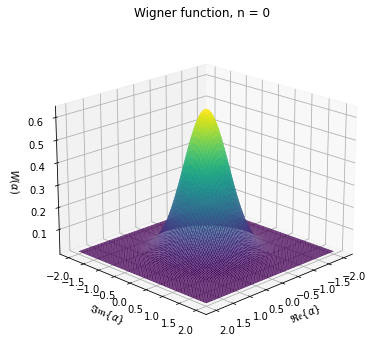

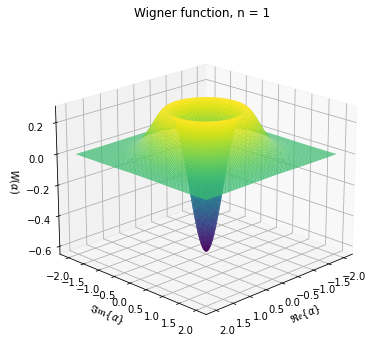

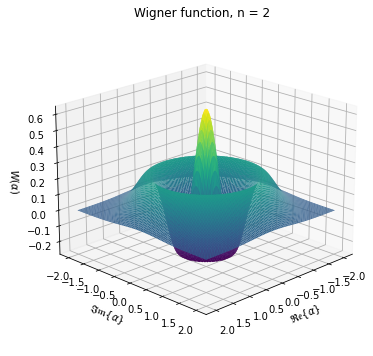

In [9]:
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
X, Y = np.meshgrid(x, y)
alpha2 = X**2+Y**2
csi = 4*alpha2
Ln = [1, -csi+1, 0.5*csi**2-2*csi+1]
for n in range (0,3):
        Z = 2/np.pi * np.exp(-csi/2)*((-1)**(n))*Ln[n]
        fig = plt.figure(figsize=(9, 6))
        ax = plt.axes(projection = '3d')
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
        #ax.contour3D(X, Y, Z, 1000)
        ax.set_xlabel(r'$\mathfrak{Re}\{\alpha\}$')
        ax.set_ylabel(r'$\mathfrak{Im}\{\alpha\}$')
        ax.set_zlabel(r'$W(\alpha)$')
        ax.set_title(r"Wigner function, n = " + str(n))
        ax.view_init(20, 45)
        plt.savefig("foto/wigner"+str(n)+".pdf", dpi=300, bbox_inches='tight')
        plt.savefig("ppt/wigner"+str(n)+".png", dpi=300, bbox_inches='tight')
        plt.show()

As we can notice, from $n = 1$, the Wigner function is somewhere negative, this means that the Fock states with $n \ge 1$ are nonclassical. The Wigner function of our state, that is a superposition of these states, can be computed as a linear combination of these three Wigner functions. In the following box, the 2D plot of the Wigner functions are computed. We recall that this is a section of the real axis, as the Wigner function are symmetric.

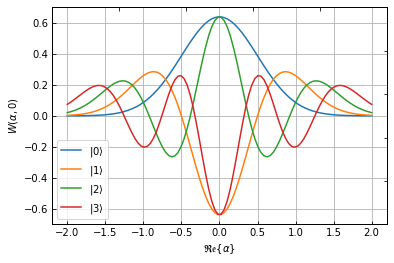

In [15]:
x = np.linspace(-2,2,100)
alpha2 = x**2
csi = 4*alpha2
fig, ax = plt.subplots(1)
# colors = ['red','mediumblue','forestgreen']
for n in range (0,4):
    Z = 2/np.pi * np.exp(-csi/2)*((-1)**(n))*Laguerre(n,csi)
    ax.plot(x, Z, label = "|" + str(n) + r"$\rangle$" )
#     ax.plot(csi, b, 'mediumblue',label=r"$|1\rangle \langle1|$", linestyle = 'dashed')
#     ax.plot(csi, c, 'forestgreen',label=r"$|2\rangle \langle2|$", linestyle = 'dashdot')
axR = ax.twinx()
axT = ax.twiny()
ax.tick_params(direction='in')
axT.tick_params(direction='in')
axR.tick_params(direction='in')
axR.yaxis.set_major_formatter(plt.NullFormatter())
axT.xaxis.set_major_formatter(plt.NullFormatter())

ax.legend()
ax.grid(True)
ax.set_xlabel(r"$\mathfrak{Re} \{ \alpha \}$")
ax.set_ylabel(r"$W(\alpha,0)$")
# plt.savefig("foto/pn.pdf", dpi=300, bbox_inches='tight')
plt.savefig("ppt/wigners2D.png", dpi=300, bbox_inches='tight')
plt.show()

The total Wigner function of $\hat \varrho$ is given by the linear combination of these 3 functions, weighted with the probability $p_n$. I plotted, for some $N_{th}$ the total Wigner, in function of $\alpha$.

#### 2D Wigner function of $\hat \varrho$

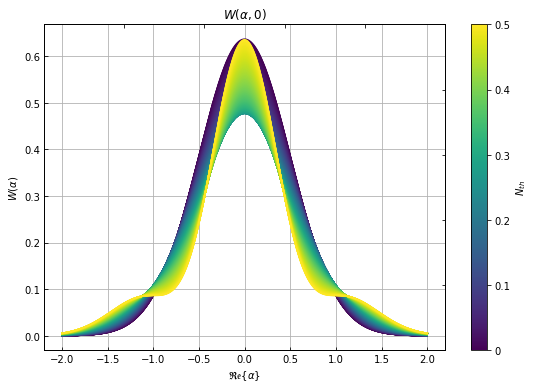

In [17]:
x = np.linspace(-2,2,500)
alpha2 = x**2
csi = 4*alpha2
contatore = 0
repN = 500
yes=1
N = 0
zetas = []
ennes = []

for n in range (0,repN):
    N = round(N,4)
    p0 = N**2 - N + 1
    p1 = N - 2 * N ** 2
    p2 = N**2
    Z = 2/(np.pi) * np.exp(-csi/(2))*(p0 - p1 *(-csi+1) + p2 *(0.5*csi**2-2*csi+1))
    zetas.append(Z)
    ennes.append(N)
    N += 0.5/repN
    if N > 0.5:
        print("error")
if yes:  
#     fig = plt.figure(figsize=(9, 6))
    fig, ax = plt.subplots(1,figsize=(9, 6))
    colors = cm.viridis(np.linspace(0, 1, len(zetas))) #cm.rainbow
    contatore = 0
    for y, c in zip(zetas, colors):
#         print(c)
        ax.plot(x, y, color = c) #, label=r"$N=$" + str(round(ennes[contatore],2))
        contatore += 1

    cbar = fig.colorbar(cm.ScalarMappable(cmap='viridis'),ticks=[0, 0.2, 0.4, 0.6, 0.8, 1]) #cbar.ax.set_yticklabels(['< -1', '0', '> 1'])
    cbar.set_label(r"$N_{th}$")
    cbar.ax.set_yticklabels(['0', '0.1', '0.2', '0.3','0.4','0.5'])
     
    axR = ax.twinx()
    axT = ax.twiny()
    ax.tick_params(direction='in')
    axT.tick_params(direction='in')
    axR.tick_params(direction='in')
    axR.yaxis.set_major_formatter(plt.NullFormatter())
    axT.xaxis.set_major_formatter(plt.NullFormatter())

#     ax.legend()
    ax.set_xlabel(r"$N_{th}$")
    ax.set_ylabel(r"$p_n$")
    # ax.show()

    ax.set_xlabel(r'$\mathfrak{Re}\{\alpha\}$')
    ax.set_ylabel(r'$W(\alpha)$')
    ax.set_title(r'$W(\alpha,0) $')
    ax.grid(True)
    plt.savefig("foto/wigner.pdf", dpi=300, bbox_inches='tight')
    plt.savefig("ppt/wigner.png", dpi=300, bbox_inches='tight')

    plt.show()

As we can notice the Wigner function of our state is positive for every value of $\alpha$ for every possible energy $N_{th}$, this doesn't allow us to say anything about the nonclassicality of our state.

#### 2D Wigner function of a thermal state

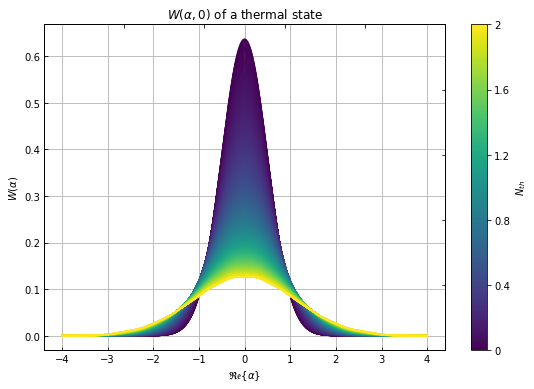

In [18]:
x = np.linspace(-4,4,5000)
alpha2 = x**2
X = 4*alpha2
# Laguerre = [1,1-X,1-2*X+0.5*X**2,1-3*X+1.5*X**2-1/6*X**3]
nth = np.linspace(0,2,1000)
zetas = []
ennes = []

for N in nth:
    p = N / (1+N)
    coeff = 2/(np.pi) * np.exp(-X/(2)) / (1+N)
    somma = 0
    for m in range(10):
        somma += (-p)**m * Laguerre(m,X)
    Z = coeff * somma
    zetas.append(Z)
    ennes.append(N)
   #     fig = plt.figure(figsize=(9, 6))
fig, ax = plt.subplots(1,figsize=(9, 6))
colors = cm.viridis(np.linspace(0, 1, len(zetas))) #cm.rainbow
contatore = 0
for y, c in zip(zetas, colors):
    ax.plot(x, y, color = c) #, label=r"$N=$" + str(round(ennes[contatore],2))
    contatore += 1

cbar = fig.colorbar(cm.ScalarMappable(cmap='viridis'),ticks=[0, 0.2, 0.4, 0.6, 0.8, 1]) #cbar.ax.set_yticklabels(['< -1', '0', '> 1'])
cbar.set_label(r"$N_{th}$")
cbar.ax.set_yticklabels(['0', '0.4', '0.8', '1.2','1.6','2'])

axR = ax.twinx()
axT = ax.twiny()
ax.tick_params(direction='in')
axT.tick_params(direction='in')
axR.tick_params(direction='in')
axR.yaxis.set_major_formatter(plt.NullFormatter())
axT.xaxis.set_major_formatter(plt.NullFormatter())

#     ax.legend()
ax.set_xlabel(r"$N_{th}$")
ax.set_ylabel(r"$p_n$")
# ax.show()

ax.set_xlabel(r'$\mathfrak{Re}\{\alpha\}$')
ax.set_ylabel(r'$W(\alpha)$')
ax.set_title(r'$W(\alpha,0) $ of a thermal state')
ax.grid(True)
plt.savefig("ppt/wignerthermal.png", dpi=300, bbox_inches='tight')
plt.show()

Here we computed the Wigner function of a thermal state, as expected, since the this state is a classical state, his Wigner function is always positive.

#### Normalization
We can check the normalization condition of all these quasi probability distribution:

In [9]:
from sympy import *
import sympy as sp
from sympy import Symbol, exp, sin, sqrt, diff, Abs, oo

x = symbols('x')
a= -oo
b= +oo
N = 0
contatore = 0
repN = 1

for n in range (0,repN):
    N = round(N,4)
    p0 = N**2 - N + 1
    p1 = N - 2 * N ** 2
    p2 = N**2
    Z = 2/(np.pi) * sp.exp(-4*x**2/(2))*(p0 - p1 *(-4*x**2+1) + p2 *(0.5*(4*x**2)**2-2*4*x**2+1))
    Zprimo = np.pi * Abs(x*Z) #formula del volume per solidi di rotazione (sfrutto la simmetria lungo l'asse z)
    N += 0.5/repN
    if integrate(Zprimo,(x,a,b)) != 1:
        print ("N = " + str(round(N,3)) + " " + str(round(integrate(Zprimo,(x,a,b)),6)))
        contatore += 1
        
if contatore == 0:
    print("normalization condition respected")

normalization condition respected


As we can see the normalization condition is respected, we are properly facing  a probability distribution

#### 3D Wigner function of $\hat \varrho$

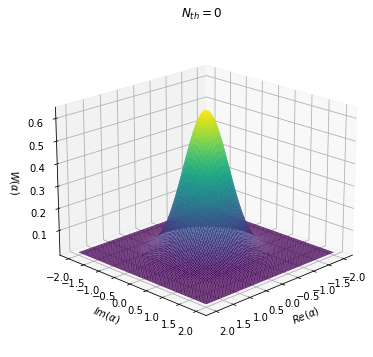

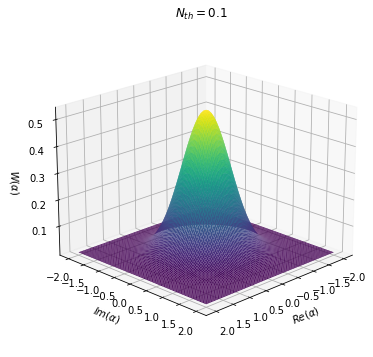

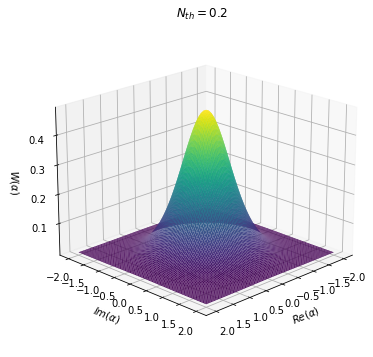

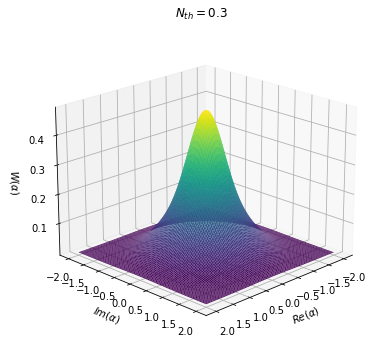

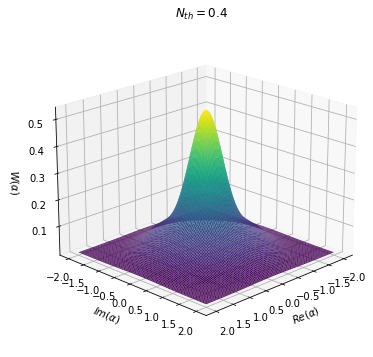

In [23]:
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
X, Y = np.meshgrid(x, y)
alpha2 = X**2+Y**2
csi = 4*alpha2
Ln = [1, -csi+1, 0.5*csi**2-2*csi+1]
rep = 20
N = 0
yes = 1
mean=np.zeros((4,rep))
min=np.zeros((4,rep))

for l in range (0,rep):
    p0 = N**2 - N + 1
    p1 = N - 2 * N ** 2
    p2 = N**2
    pn = [p0, p1, p2]
    for n in range (0,3):
        Z = 2/np.pi * np.exp(-csi/2)*((-1)**(n))*pn[n]*Ln[n]
        A = np.reshape(Z,shape(Z)[0]*shape(Z)[1])
        min[n][l] = np.min(A)
        
    z=0
    for n in range (0,3):
        z += 2/np.pi * np.exp(-csi/2)*((-1)**n)*pn[n]*Ln[n]
    if yes:
        if l%4==0:
            fig = plt.figure(figsize=(9, 6))
            ax = plt.axes(projection = '3d')
            ax.plot_surface(X, Y, z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
            #ax.contour3D(X, Y, z, 1000)
            ax.set_xlabel(r'$Re(\alpha)$')
            ax.set_ylabel(r'$Im(\alpha)$')
            ax.set_zlabel(r'$W(\alpha)$')
            ax.set_title("$N_{th} = $"+str(round(N,1)))
            ax.view_init(20, 45)
            plt.grid(True)
            plt.show()   
    A = np.reshape(z,shape(z)[0]*shape(z)[1])
    min[3][l] = np.min(A)
    N += 0.5/rep

As we can notice, the total Wigner function is entirely non negative, because of the parabolic suppression of the negative Wigner function in correspondence of $L_1$ and $L_2$. We can't use this condition in order to verify if out state is non classical.

## <span style="color:blue">  #3 </span> 27/07/2021

A second way to see if our state is nonclassical is through another definition of the quasi-probability distribution, namely:

$$
W(\alpha,p) = \frac{1}{\pi^2} \int_{\mathbb C} {d^2 \lambda \chi(\lambda,p) e^{\alpha \lambda^* - \alpha ^* \lambda}}
$$

But we can't write our state as 
$$
\hat \varrho = \int_{\mathbb C} {d^2 \alpha \ P(\alpha) \ |\alpha \rangle \langle \alpha| }
$$
unless using a Dirac delta. 

This fact imples that our state, namely a mixture, is non classical. In fact every truncated mixture is non classical. Now we are interested in classify the "non classicality degree".

So we have to compute the non classicality. In ordere to do this, we let variate $q$ as a function of $p_n$: $ q = q (p_0, p_1, p_2) $. One of the convolutions must be negative. Physically we are mixing termic light with the purpose to make our state classical.
We have to find that parameters to have the violation. (For example let's set $p=1, q=0$; then generic $q$)

### Property of the quasi-probability distribution $W(\alpha,p)$


####  - Normalization 
We can demonstrate the normalization property as we start from:

$$
\frac{1}{\pi^2} \int_{\mathbb C} {d^2 \lambda  e^{\alpha \lambda^* - \alpha ^* \lambda}} = \delta^{(2)}(\alpha)
$$

in order to show that $W(\alpha,p)$ is normalized: 

$$
\int_{\mathbb C} {d^2 \alpha W(\alpha,p)} = \frac{1}{\pi^2} \int_{\mathbb C} {d^2 \lambda \ \chi(\lambda,p) \int_{\mathbb C} {d^2 \alpha \ e^{\alpha \lambda^* - \alpha ^* \lambda}}} = \chi (0,p) = Tr[\hat \rho] = 1
$$
#### - Moment generator function
As we expect from a probability distribution (integrating by parts, max[$m,n$] times):

$$
\int_{\mathbb C} {d^2 \alpha W(\alpha,p)(\alpha^*)^m \ \alpha^n} = \ ... \ = \left( \frac {\partial}{\partial \lambda}\right )^m \ 
\left( -\frac {\partial}{\partial \lambda^*}\right )^n \chi(\lambda,p) \big|_{\lambda = 0} = \langle (\hat a ^\dagger)^m \ \hat a ^n \rangle _p
$$
#### - Convolution
We know that the Wigner function is a convolution of the P-Glauber function with a Gaussian with variance $1/2$. When the variance is $1$, we are at the maximum: a thermal state with at least one photon destroy the ??.

We recall that, for $q<p$:
$$
\chi (\lambda,q) = \chi (\lambda,p) e^{-(p-q)|\lambda|^2/2}
$$
In order to write a relation between $W(\alpha,q)$ and $W(\alpha,p)$, namely:

$$
W(\alpha,q) = \frac{2}{\pi (p-q)} \int_{\mathbb C} {d^2 \beta \ W(\beta,p) \ exp \left[ -\frac{2|\alpha-\beta|^2}{p-q} \right] }; \qquad q<p
$$

For $p=1$, this is a convolution between the P-Glauber function : $W(\alpha,1) = P(\alpha)$ and a Gaussian distribution with $\sigma = 1/2$, in general $\sigma = \frac{p-q}{2} = \frac{1-q}{2}$. $\sigma$ is named "non-classical depth".

### Nonclassicality

Our purpose is to see whenever this Wigner function becomes negative. Namely the first negative function. This nonclassicality is related to what we see after the beam-splitter.

 - ####  $p=1, q=0$

$$
W(\alpha,0) = \frac{2}{\pi} \int_{\mathbb C} {d^2 \beta \ W(\beta,1) \ e^{  -2|\alpha-\beta|^2 } }
$$
With 
$$
W(\beta,1) = \sum_{n=0}^2{P_n(\beta) \ p_n}; \qquad P_n(\beta) = \sum_{m=0}^n { {n\choose m}  \frac{1}{m!}\left( \frac{\partial^2}{\partial \beta \partial \beta^*}\right)^m \delta^{(2)}(\beta)}
= (-1)^n \ L_n\left( \frac{\partial^2}{\partial \beta \partial \beta^*}\right)  \delta^{(2)} \beta
$$
That is the Glauber-Sudarshan P-representation (or P-representation) for a Fock state.

But we already know the result for the $q=0$ case (see before):
$$
W(\alpha,0) = \frac{2}{\pi} e^{-2|\alpha|^2} \left[ p_0 - p_1(-4|\alpha|^2+1) + 
 p_2 \left(\frac{1}{2}(4|\alpha|^2)^2-2\cdot4|\alpha|^2+1\right) \right]
$$
These are the calculation in order to demonstrate that in both cases we obtain the same results:
$$
W(\alpha,0) = \frac{2}{\pi} \int_{\mathbb C} {d^2 \beta \ W(\beta,1) \ e^{  -2|\alpha-\beta|^2 } }=\\
 = \frac{2}{\pi} \int_{\mathbb C} {d^2 \beta \  \sum_{n=0}^2{P_n(\beta)\ p_n} \ e^{  -2|\alpha-\beta|^2 } }=\\
 = \frac{2}{\pi} \int_{\mathbb C} {d^2 \beta \ e^{ -2|\alpha-\beta|^2}\  \sum_{n=0}^2{ p_n \ \sum_{m=0}^n 
 { {n\choose m}  \frac{1}{m!}  \left( \frac{\partial^2}{\partial \beta \partial \beta^*}  \right)^m \delta^{(2)}(\beta) } } } = \\
  = \frac{2}{\pi} \int_{\mathbb C} {d^2 \beta \ e^{ -2|\alpha-\beta|^2}\  \left( p_0 \delta^{(2)}(\beta) 
  + p_1\left[ \delta^{(2)}(\beta) +   \left( \frac{\partial^2}{\partial \beta \partial \beta^*} \right) \delta^{(2)}(\beta) \right]
  + p_2\left[ \delta^{(2)}(\beta) + 2  \left(  \frac{\partial^2}{\partial \beta \partial \beta^*} \right) \delta^{(2)}(\beta) 
  +\frac{1}{2}  \left(  \frac{\partial^2}{\partial \beta \partial \beta^*} \right)^2 \delta^{(2)}(\beta) \right] \right) } =
$$

The first term with $p_0$ is trivial:
$$
\int_{\mathbb C} {d^2 \beta \ e^{ -2|\alpha-\beta|^2} \   p_0 \ \delta^{(2)}(\beta)} = p_0 \ e^{ -2|\alpha|^2}
$$
The second term gives us:
$$
p_1 \int_{\mathbb C} {d^2 \beta \ e^{ -2|\alpha-\beta|^2}\ 
\left[ \delta^{(2)}(\beta) +   \left( \frac{\partial^2}{\partial \beta \partial \beta^*} \right) \delta^{(2)}(\beta) \right]} 
=p_1  \left ( \ e^{ -2|\alpha|^2}  + \int_{\mathbb C} {d^2 \beta \ e^{ -2|\alpha-\beta|^2}\    
\left( \frac{\partial}{\partial \beta} \right) \left(- \frac{\partial}{ \partial \beta^*} \right) \delta^{(2)}(\beta) } \right) \\
= p_1  \left( \ e^{ -2|\alpha|^2} - \int_{\mathbb C} {d^2 \beta \ e^{ -2|\alpha-\beta|^2}\    
(-4|\alpha-\beta|^2+2) \ \delta^{(2)}(\beta) } \right)=\\
=p_1  \left(  e^{ -2|\alpha|^2} - e^{ -2|\alpha|^2} \  (-4|\alpha|^2+2)  \right) 
=   -p_1 \left( -4|\alpha|^2 + 1 \right) e^{ -2|\alpha|^2}
$$
... the same holds for the third element.

- #### p=1, 0<q<1

As we already shown in the previous graph, the Wigner function with $q=0$ is always non-negative, now let's find a generalization of the previous formulas for a generic $q$, (keeping p generic but set $p=1$).
$$
W(\alpha,q) = \frac{2}{\pi(p-q)} \int_{\mathbb C} {d^2 \beta \ W(\beta,1) \ exp \left(  -2\frac{|\alpha-\beta|^2}{p-q} \right) }=\\
 = \frac{2}{\pi(p-q)} \int_{\mathbb C} {d^2 \beta \  \sum_{n=0}^2{P_n(\beta)\ p_n} \ exp \left(  -2\frac{|\alpha-\beta|^2}{p-q} \right) }=\\
 = \frac{2}{\pi(p-q)} \int_{\mathbb C} {d^2 \beta \ exp \left(  -2\frac{|\alpha-\beta|^2}{p-q} \right)\  \sum_{n=0}^2{ p_n \ \sum_{m=0}^n 
 { {n\choose m}  \frac{1}{m!}  \left( \frac{\partial^2}{\partial \beta \partial \beta^*}  \right)^m \delta^{(2)}(\beta) } } } = \\
  = \frac{2}{\pi(p-q)} \int_{\mathbb C} {d^2 \beta \ exp \left(  -2\frac{|\alpha-\beta|^2}{p-q} \right)\  \left( p_0 \delta^{(2)}(\beta) 
  + p_1\left[ \delta^{(2)}(\beta) +   \left( \frac{\partial^2}{\partial \beta \partial \beta^*} \right) \delta^{(2)}(\beta) \right]
  + p_2\left[ \delta^{(2)}(\beta) + 2  \left(  \frac{\partial^2}{\partial \beta \partial \beta^*} \right) \delta^{(2)}(\beta) 
  +\frac{1}{2}  \left(  \frac{\partial^2}{\partial \beta \partial \beta^*} \right)^2 \delta^{(2)}(\beta) \right] \right) } =
  $$

In [25]:
from sympy import Symbol, exp, sin, sqrt, diff

In [26]:
b1,b2,a1,a2,pi,qu= symbols(r'\beta,\beta^*,\alpha, \alpha^*, p,q')
function = exp((a1-b1)*(a2-b2)*(-2)/(pi-qu))
display(function)
diff1bstar = sp.diff(function, b2)
diff1b = sp.diff(-diff1bstar,b1)
display(diff1b)

exp(-2*(\alpha - \beta)*(\alpha^* - \beta^*)/(p - q))

-4*(\alpha - \beta)*(\alpha^* - \beta^*)*exp(-2*(\alpha - \beta)*(\alpha^* - \beta^*)/(p - q))/(p - q)**2 + 2*exp(-2*(\alpha - \beta)*(\alpha^* - \beta^*)/(p - q))/(p - q)

In [27]:
diff2b = sp.diff(diff1b, b1)
display(diff2b)
diff2bstar = sp.diff(diff2b,b2)
display(-1*diff2bstar)

-8*(\alpha - \beta)*(\alpha^* - \beta^*)**2*exp(-2*(\alpha - \beta)*(\alpha^* - \beta^*)/(p - q))/(p - q)**3 + 8*(\alpha^* - \beta^*)*exp(-2*(\alpha - \beta)*(\alpha^* - \beta^*)/(p - q))/(p - q)**2

16*(\alpha - \beta)**2*(\alpha^* - \beta^*)**2*exp(-2*(\alpha - \beta)*(\alpha^* - \beta^*)/(p - q))/(p - q)**4 - 16*(\alpha - \beta)*(\alpha^* - \beta^*)*exp(-2*(\alpha - \beta)*(\alpha^* - \beta^*)/(p - q))/(p - q)**3 - (\alpha - \beta)*(16*\alpha^* - 16*\beta^*)*exp(-2*(\alpha - \beta)*(\alpha^* - \beta^*)/(p - q))/(p - q)**3 + 8*exp(-2*(\alpha - \beta)*(\alpha^* - \beta^*)/(p - q))/(p - q)**2

Making the calculation ... 
$$
W(\alpha,q) = \frac{2}{\pi(p-q)} exp \left(  -2\frac{|\alpha|^2}{p-q} \right)
\left[ p_0 - p_1\left(\frac{-4|\alpha|^2}{(p-q)^2}+\frac{2}{p-q}-1\right) 
+ p_2 \left( \frac{8|\alpha|^4}{(p-q)^4} - \frac{16|\alpha|^2}{(p-q)^3} + \frac{4+8|\alpha|^2}{(p-q)^2} - \frac{4}{p-q} + 1     \right) \right]
$$

Now we are ready to compute the total quasiprobaility function $W(\alpha,q)$ 

### Quasiprobability function of $\hat \varrho$ for $0 < q < 1$

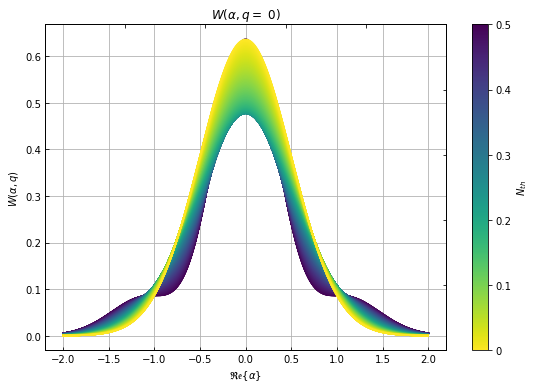

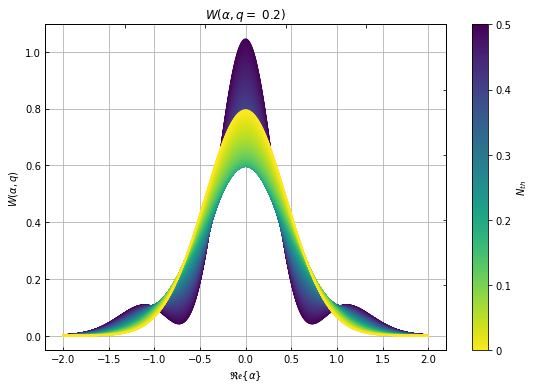

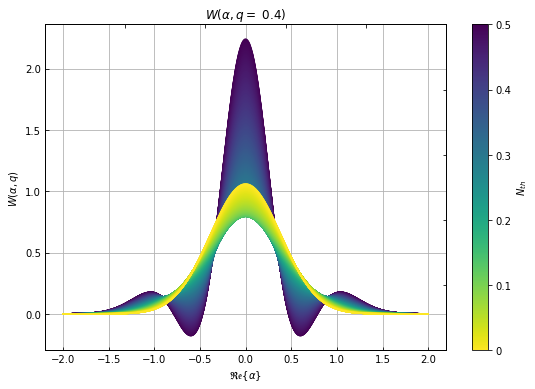

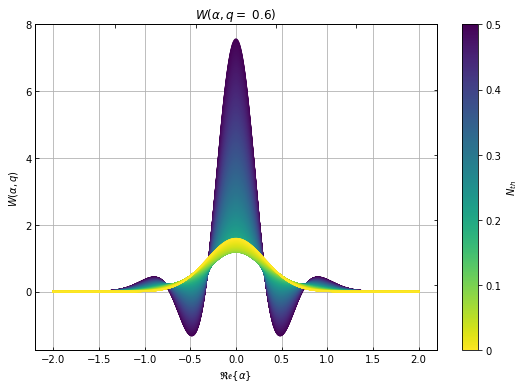

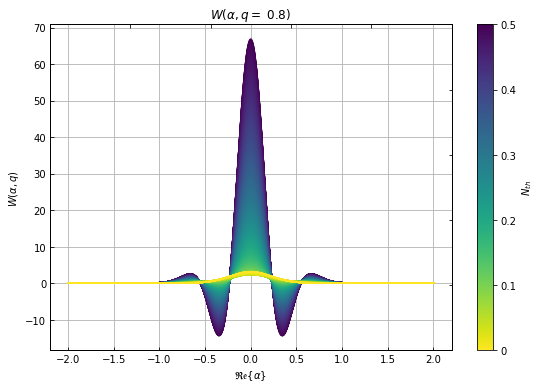

In [28]:
repN = 1000
repq = 1000
#N = linspace(0,0.5,50)
#q = linspace(0,1,500)
yes = 1
p = 1
q = 0
perq = 1
quantigrafici = 5

x = np.linspace(-2,2,500)
alpha2 = x**2
csi = 4*alpha2
contatore = 0
mins = []
qs = []
for l in range (0,repq):
    N = 0.5
    zetas = []
    ennes = []
    for n in range (0,repN):
        N = round(N,4)
        p0 = N**2 - N + 1
        p1 = N - 2 * N ** 2
        p2 = N**2
        d = p-q
        Z = 2/(np.pi*d) * np.exp(-csi/(2*d))*(p0 - p1 *((-csi/d**2)+(2/d)-1) + p2 *((0.5*csi**2/d**4)-(4*csi/d**3)+((4+2*csi)/d**2)-(4/d)+1))
        zetas.append(Z)
        ennes.append(N)
        N -= 0.5/repN
        if N > 0.5:
            print("error")
    if (np.min(zetas) > 0):
            mins.append(0)
    else:
        mins.append(np.min(zetas))
    
    if yes:  
        if l%(repq/quantigrafici)==0:
#             fig = plt.figure(figsize=(9, 6))
            fig, ax = plt.subplots(1,figsize=(9, 6))
            colors = cm.viridis(np.linspace(0, 1, len(zetas)))
            contatore = 0
            for y, c in zip(zetas, colors):
                plt.plot(x, y, color = c, label=r"$N=$" + str(round(ennes[contatore],2)))
                contatore += 1
                
                
            cbar = fig.colorbar(cm.ScalarMappable(cmap='viridis_r'),ticks=[0, 0.2, 0.4, 0.6, 0.8, 1]) #cbar.ax.set_yticklabels(['< -1', '0', '> 1'])
            cbar.set_label(r"$N_{th}$")
            cbar.ax.set_yticklabels(['0', '0.1', '0.2', '0.3','0.4','0.5'])

            axR = ax.twinx()
            axT = ax.twiny()
            ax.tick_params(direction='in')
            axT.tick_params(direction='in')
            axR.tick_params(direction='in')
            axR.yaxis.set_major_formatter(plt.NullFormatter())
            axT.xaxis.set_major_formatter(plt.NullFormatter())

            ax.set_xlabel(r'$\mathfrak{Re}\{\alpha\}$')
            ax.set_ylabel(r'$W(\alpha,q)$')
            ax.set_title(r'$W(\alpha,q = $ ' +str(round(q,4)) + ")" )
            ax.grid(True)
            
#             plt.savefig("foto/wigner.pdf", dpi=300, bbox_inches='tight')
            if q == 0.2:
                plt.savefig("ppt/positive.png", dpi=300, bbox_inches='tight')
            if q == 0.4:
                plt.savefig("ppt/negative.png", dpi=300, bbox_inches='tight')
            plt.show()

#             plt.xlabel(r'$Re(\alpha)$')
#             plt.ylabel(r'$W(\alpha)$')
#             plt.title(r'$q =$'+str(round(q,4)) )
            #plt.legend()
    q = round(q,4)
    qs.append(q)
    q += perq/repq

As we can see, there are some intervals of the domain in which the quasiprobability function becomes negative. This is sufficient to proove the nonclassicality of the state.

Even in this case we are interested in checking the normalization condition:

In [18]:
repN = 20
repq = 5
perq = 1
x = symbols('x')
a= -oo
b= +oo
q=0
contatore = 0
for l in range (0,repq):
    N = 0
    for n in range (0,repN):
        N = round(N,4)
        p0 = N**2 - N + 1
        p1 = N - 2 * N ** 2
        p2 = N**2
        d = 1-q
        Z = 2/(np.pi*d) * sp.exp(-4*x**2/(2*d))*(p0 - p1 *((-4*x**2/d**2)+(2/d)-1) + p2 *((0.5*(4*x**2)**2/d**4)-(4*4*x**2/d**3)+((4+2*4*x**2)/d**2)-(4/d)+1))    
        Zv = np.pi * Abs(x*Z) #formula del volume per solidi di rotazione (sfrutto la simmetria lungo l'asse z)
        N += 0.5/repN
       # print ("N = " + str(round(N,3)) + " , q =  "+ str(round(q,4)) + " , V = " + str(round(integrate(Zv,(x,a,b)),4)))
    q += perq/repq  

Also in this case the normalization condition is respected

#### Trend of nonclassicality

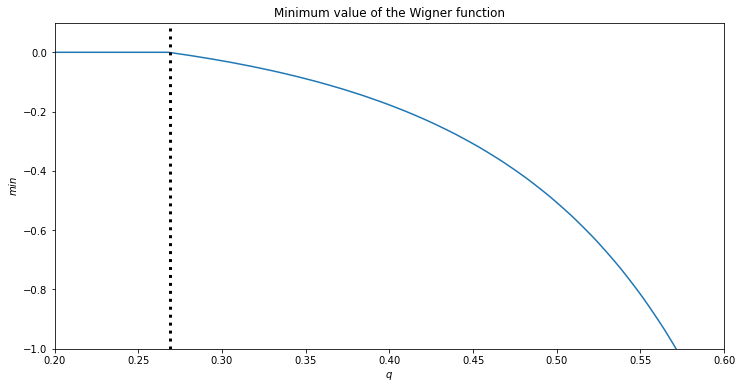

q = 0.269
sigma = 0.4275


In [29]:
for l in range(len(mins)):
    if mins[l] < 0: 
        L = l
        Q = qs[l]
        #print(Q,L)
        break
fig = plt.figure(figsize=(12,6))
plt.plot(qs, mins) #marker='.',linewidth = 0
plt.axvline(Q,  c="black", lw=3, ls=':')
plt.xlabel(r"$q$")
plt.xlim(0.2,0.6)
plt.ylim(-1,0.1)
plt.ylabel(r"$min$")
plt.title(r"Minimum value of the Wigner function")
plt.show()
print ("q = " + str(round(Q,4)))
sigma = sqrt(p-Q)/2
print (r"sigma = " + str (    round(sigma,4) ))

#### Print of the data

In [30]:
zprint = []
nprint = []
qprint = []
nappo = []
repN = 500
repq = 1000
x = np.linspace(-2,2,500)
N=0
q=0
ns = []
Q = round(Q,4)
print(repq, repN, Q)

for l in range (0,repq):
    q = round(q,4)
#     print("q = " + str(q))
    N=0.5
    zs = []
    for n in range (0,repN):
        p0 = N**2 - N + 1
        p1 = N - 2 * N ** 2
        p2 = N**2
        d = p-q
        Z = 2/(np.pi*d) * np.exp(-csi/(2*d))*(p0 - p1 *((-csi/d**2)+(2/d)-1) + p2 *((0.5*csi**2/d**4)-(4*csi/d**3)+((4+2*csi)/d**2)-(4/d)+1))

        if q==0:
            ns.append(round(N,3))
        if q == Q:
            zprint.append(Z)
        zs.append(Z)        
        N -= 0.5/repN

    ###come varia N in funzione di q
    for k in range(len(zs)):
        accu = 0
        for zz in zs[k]:
            if zz<0:
                accu += 1
        if accu > 0:
            nappo.append(ns[k])

    if size(nappo)>0:
        nprint.append(np.min(nappo))
    else:
        nprint.append(0)
    #################################
    qprint.append(q)        
    q += (perq)/(repq)

1000 500 0.269


#### Plot of the zeroth negative function

We are interested in finding a relation between the first q that makes the quasiprobability function negative, and $N_{th}$.

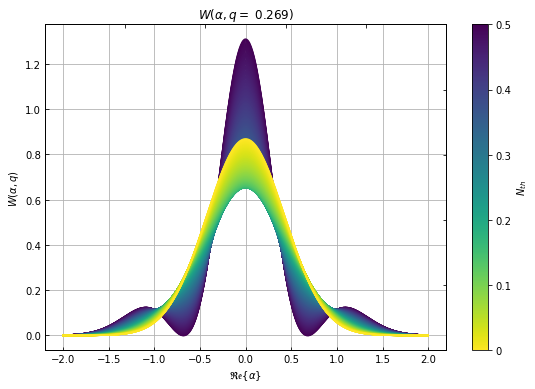

In [31]:
# fig = plt.figure(figsize=(9, 6))
fig, ax = plt.subplots(1,figsize=(9, 6))
colors = cm.viridis(np.linspace(0, 1, len(zprint)))
contatore = 0

for y, c in zip(zprint, colors):
    plt.plot(x, y, color = c, label=r"$N=$" + str(round(ns[contatore],2)))
    contatore += 1

cbar = fig.colorbar(cm.ScalarMappable(cmap='viridis_r'),ticks=[0, 0.2, 0.4, 0.6, 0.8, 1]) #cbar.ax.set_yticklabels(['< -1', '0', '> 1'])
cbar.set_label(r"$N_{th}$")
cbar.ax.set_yticklabels(['0', '0.1', '0.2', '0.3','0.4','0.5'])

axR = ax.twinx()
axT = ax.twiny()
ax.tick_params(direction='in')
axT.tick_params(direction='in')
axR.tick_params(direction='in')
axR.yaxis.set_major_formatter(plt.NullFormatter())
axT.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_xlabel(r'$\mathfrak{Re}\{\alpha\}$')
ax.set_ylabel(r'$W(\alpha,q)$')
ax.set_title(r"$W(\alpha, q =$ "+ str(round(Q,4)) + ")" )
ax.grid(True)
plt.savefig("foto/negative.pdf", dpi=300, bbox_inches='tight')
plt.savefig("ppt/zero.png", dpi=300, bbox_inches='tight')

plt.show()

In [34]:
qprintappo = []
nprintappo = []
for ele in qprint:
    qprintappo.append(ele)
for elem in nprint:
    nprintappo.append(elem)

In [35]:
print ("q = " + str(round(Q,4)))
sigma = sqrt(p-Q)/2
print (r"sigma = " + str (    round(sigma,4) ))

qprimo = []
for q in qprintappo:
    qprimo.append( (1-q)/2)

n = linspace(0,0.5,1000)
ny = n-np.sqrt(n*(n+1))
accu = 0
print(len(nprintappo))
print(len(qprimo))
for i in range(200):
#     print(nprint[i])
#     print(i)
#     print(nprintappo[i])
    if nprintappo[0]==0:
        nprintappo.pop(0)
        qprimo.pop(0)
#         print(len(nprintappo))
#         print(len(qprimo))
# print(nprintappo)
# print(qprimo)

q = 0.269
sigma = 0.4275
1000
1000


So the first q that makes the quasiprobability function, is q = 0.269

### Non classical depth

We can check the relation between the energy and q introducing a new parameter: the nonclassical depth.
$$
\tau = \frac{1-q}{2}
$$
where q is the first that makes the quasiprobability function negative and represents the number of thermal photons that are necessary to erase all the quantum features of an optic states.

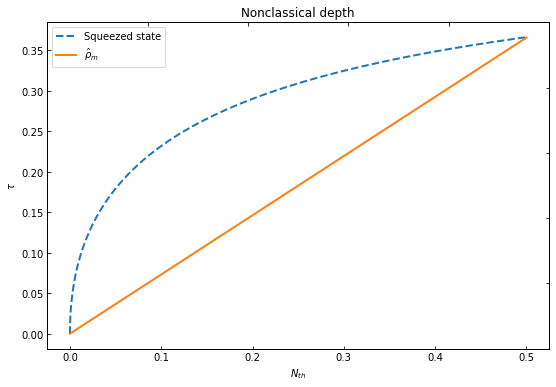

In [36]:
x = linspace(0,0.5,100)
y = (1-0.269)*x
n = linspace(0,0.5,1000)
ny = -n+np.sqrt(n*(n+1))

# fig = plt.figure(figsize=(18,12))
fig, ax = plt.subplots(1,figsize=(9, 6))

# plt.plot(nprintappo, qprimo , linewidth = 1, label=r"$\hat \rho$" )
ax.plot(n,ny,  linewidth = 2, label = "Squeezed state", linestyle = 'dashed' )
ax.plot(x,y,  linewidth = 2, label = r"$\hat \rho_m$", linestyle = 'solid' )

axR = ax.twinx()
axT = ax.twiny()
ax.tick_params(direction='in')
axT.tick_params(direction='in')
axR.tick_params(direction='in')
axR.yaxis.set_major_formatter(plt.NullFormatter())
axT.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_xlabel(r"$N_{th}$")
ax.set_ylabel(r"$\tau$")
ax.set_title(r"Nonclassical depth")
ax.legend()
# ax.grid()
plt.savefig("foto/tau.pdf", dpi=300, bbox_inches='tight')
plt.savefig("ppt/tau_.png", dpi=300, bbox_inches='tight')

plt.show()

The nonclassicaltepth of our state turns out to be a linear function of the energy. We also compared this $\tau$ with the one of a squeezed state, in particular the $\tau_{\hat \varrho}$ is always smaller than the nonclassical depth of a squeezed state (see section 4 for the analytical expression of the nonclassical depth for a squeezed state).

#### Zeroth quasi probability function of $\hat \varrho$

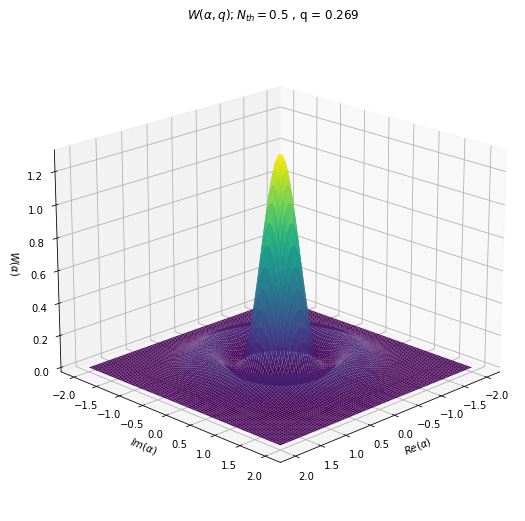

In [37]:
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
X, Y = np.meshgrid(x, y)
alpha2 = X**2+Y**2
csi = 4*alpha2
#Ln = [1, -csi+1, 0.5*csi**2-2*csi+1]
repN = 6
repq = 6
N = 0.5
#yes = 1
p = 1
q = Q
#for n in range (0,repN):
p0 = N**2 - N + 1
p1 = N - 2 * N ** 2
p2 = N**2
d = p-q
#pn = [p0, p1, p2]
#for n in range (0,3):
Z = 2/(np.pi*d) * np.exp(-csi/(2*d))*(p0 - p1 *(-csi/d**2+2/d-1) + p2 *(0.5*csi**2/d**4-4*csi/d**3+(4+2*csi)/d**2-4/d+1))
#if yes:
fig = plt.figure(figsize=(12, 9))
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
#ax.contour3D(X, Y, z, 1000)
ax.set_xlabel(r'$Re(\alpha)$')
ax.set_ylabel(r'$Im(\alpha)$')
ax.set_zlabel(r'$W(\alpha)$')
ax.set_title(r"$ W( \alpha$$,q) ;  N_{th} = $"+str(round(N,2)) + " , q = " +str(round(q,4)))
ax.view_init(20, 45)
plt.grid(True)
plt.show()   

We found out that:
 - The first $q$ according to which $W(\alpha,q) < 0$ is $q^\star = 0.269$.
 - After $q^\star$ the trend of the first $N_{th}$ that makes $W(\alpha,q)$ negative is linear
 
 After all, we demonstrated that our state is nonclassical.

## <span style="color:blue">  #4 </span> 05/08/2021

 Furthermore we compared the non-classical depth of our state with that of a squeezed state, in fact a squeezed vacuum is easier to prepare. 
 For this state we have:
 $$
 \Sigma = - \langle N \rangle + \sqrt{\langle N \rangle(\langle N \rangle+1)}
 $$
 $$
 q = \frac {1-e^{-2r}}{2} 
 $$
 We are interested in the non-classicality of the corresponding squeezed state with the same energy.
 
 We can get it from the statistics of a squeezed state, in fact, for a squeeed vacuum, namely:
 
 $$
 \hat S(\xi) |0 \rangle = \frac{1}{\sqrt{\mu}} \sum_{n=0}^{\infty}{\left( \frac {\nu}{2 \mu}\right) ^ n \frac{\sqrt{(2n)!}}{n!} | 2n \rangle}
 $$
 with $\xi = r e ^ {i \psi}$, $\mu = \cosh r $ and $\nu = \sinh r$. For semplicity we take the case with $\psi = 0$ in order to have $\xi = r \in \mathbb R$.
 
 One can show that:
 
 $$
 \langle \hat n \rangle = \sinh^2 r\\
 \Delta ^ 2 (\hat n ) = 2 \sinh^2 r (\sinh^2 r +1)\\
 \langle \hat x _ \theta \rangle = 0\\
 \Delta ^ 2 (\hat x _ \theta ) = e^{2r} \cos^2\theta+ e^{-2r} \sin^2\theta\\
 $$
 
 We are interested in the squeezed state because his first terms can quite describe our state... in fact:
 $$
 |\psi\rangle = \frac{1}{\sqrt{\cosh r}} \left( |0 \rangle + \frac{\tanh r}{\sqrt 2} | 2 \rangle \right)
 $$
with the suppression of the higher order terms.

If we consider the quadrature operator, with $\theta = \pi / 2$:
$$
\hat{x}_\theta = \hat a e ^{- i \theta } +\hat a ^ \dagger e ^{ i \theta } \big|_{\theta = \pi/2} = i \frac{\hat a ^\dagger - a}{\sqrt 2}
$$
and:

The Wigner function of the squeezed state:
$$
W (\alpha) = \exp\left( -\frac{x^2}{e^{-2r}} \right) \ \exp\left(-\frac{y^2}{e^{-2r}}\right)
$$
With $\alpha = x + i \, y $. 

The energy $\langle N \rangle$ for a squeezed state, with $a \to \cosh (r) a + \sinh( r) a^\dagger$
$$
\langle N \rangle = \sinh^2 r 
$$
namely:
$$
\langle \psi | \hat{ x} _  {\pi/2} ^2 | \psi \rangle = e ^ {-2r} < 1 
$$
where 1 is for the vacuum, that implies that our state is non-classical.
and
$$
\langle \psi | \hat{ x} _  {\pi/2}  | \psi \rangle = 0
$$
From the prevoius property and the property of the $\sinh$ and $\cosh$:
$$
e^{-2r} = 1 + 2 \langle N \rangle - 2 \ \sqrt{\langle N \rangle ( \langle N \rangle +1 )}
$$
